In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sb
 

In [5]:
#Data for Incidence rate 
final_combined_cancer_data = "Resource/final_combined_cancer_data.csv"
final_combined_cancer_data = pd.read_csv(final_combined_cancer_data)
final_combined_cancer_data.head()

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
0,New Mexico,374.3,9116.0,144.0,3514.0
1,Arizona,387.0,30448.0,144.1,11508.0
2,Nevada,392.6,12409.0,162.3,4934.0
3,Wyoming,397.3,2638.0,144.7,943.0
4,Colorado,401.4,22701.0,138.9,7520.0


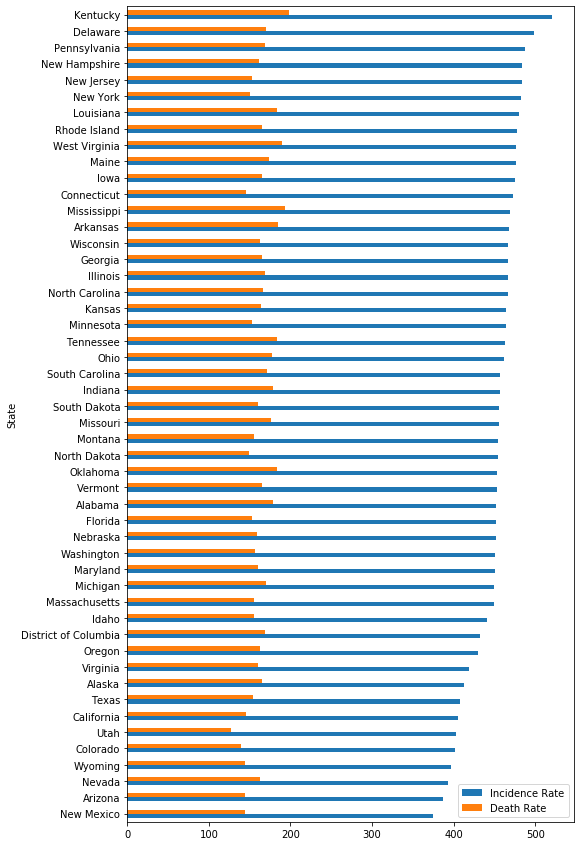

In [6]:
#Bar graph for Inceidence and Death Rate
bx = final_combined_cancer_data.set_index('State')
ax= bx[['Incidence Rate','Death Rate']].plot(kind="barh", figsize=(8,15))

In [4]:
Incidence_Rate = final_combined_cancer_data['Incidence Rate']
Death_Rate = final_combined_cancer_data['Death Rate'] 
quartiles_inc = Incidence_Rate.quantile([.25,.5,.75])
lowerq_inc = round(quartiles_inc[0.25],2)
upperq_inc = round(quartiles_inc[0.75],2)
iqr_inc = round(upperq_inc-lowerq_inc,2)

print(f"The lower quartile of Incidence Rate is:{lowerq_inc}")
print(f"The upper quartile of Incidence Rate is: {upperq_inc}")
print(f"The interquartile range of Incidence Rate is: {iqr_inc}")
print(f"The the median of Incidence Rate is: {quartiles_inc[0.5]} ")

lower_bound_inc = round(lowerq_inc - (1.5*iqr_inc),2)
upper_bound_inc = round(upperq_inc + (1.5*iqr_inc),2)
print(f"Values below {lower_bound_inc} could be outliers.")
print(f"Values above {upper_bound_inc} could be outliers.")

quartiles_dea = Death_Rate.quantile([.25,.5,.75])
lowerq_dea = round(quartiles_dea[0.25],2)
upperq_dea = round(quartiles_dea[0.75],2)
iqr_dea = round(upperq_dea-lowerq_dea,2)

print(f"The lower quartile of Death Rate is:{lowerq_dea}")
print(f"The upper quartile of Death Rate is: {upperq_dea}")
print(f"The interquartile range of Death Rate is: {iqr_dea}")
print(f"The the median of Death Rate is: {quartiles_dea[0.5]} ")

lower_bound_dea = round(lowerq_dea - (1.5*iqr_dea),2)
upper_bound_dea = round(upperq_dea + (1.5*iqr_dea),2)
print(f"Values below {lower_bound_dea} could be outliers.")
print(f"Values above {upper_bound_dea} could be outliers.")
print(Incidence_Rate < lower_bound_inc |(Incidence_Rate > upper_bound_inc)

SyntaxError: unexpected EOF while parsing (<ipython-input-4-78dc633e3e7c>, line 32)

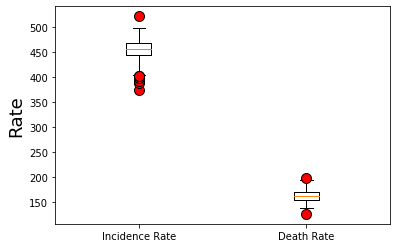

In [7]:
marker_outliers=dict(markerfacecolor='red',markersize=10) 
Incidence_Rate = final_combined_cancer_data['Incidence Rate']
Death_Rate = final_combined_cancer_data['Death Rate']  
plt.boxplot([Incidence_Rate, Death_Rate], labels=['Incidence Rate','Death Rate'], flierprops=marker_outliers)

plt.ylabel("Rate", size= 18)
plt.show()

In [8]:
#Low Outliers for Incidence rate
low_outliers= final_combined_cancer_data.loc[final_combined_cancer_data['Incidence Rate']<=404]
low_outliers

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
0,New Mexico,374.3,9116.0,144.0,3514.0
1,Arizona,387.0,30448.0,144.1,11508.0
2,Nevada,392.6,12409.0,162.3,4934.0
3,Wyoming,397.3,2638.0,144.7,943.0
4,Colorado,401.4,22701.0,138.9,7520.0
5,Utah,402.8,10143.0,127.0,3021.0


In [9]:
#High Outliers for Incidence rate
high_outliers= final_combined_cancer_data.loc[final_combined_cancer_data['Incidence Rate']>=506 ]
high_outliers

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
49,Kentucky,520.9,26945.0,197.9,10206.0


In [10]:
#Low Outliers for Death rate
low_outliers= final_combined_cancer_data.loc[final_combined_cancer_data['Death Rate']<=128 ]
low_outliers

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
5,Utah,402.8,10143.0,127.0,3021.0


In [11]:
#High Outliers for Incidence rate
high_outliers= final_combined_cancer_data.loc[final_combined_cancer_data['Death Rate']>=197 ]
high_outliers

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
49,Kentucky,520.9,26945.0,197.9,10206.0


In [12]:
#Data for Death Rate 
Added_final_combined_cancer_data = "Resource/Added_final_combined_cancer_data.csv"
Added_final_combined_cancer_data = pd.read_csv(Added_final_combined_cancer_data)
Rounded_data = Added_final_combined_cancer_data
Rounded_data.head()


,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,New Mexico,374.0,9116.0,144.0,3514.0,39.0
1,Arizona,387.0,30448.0,144.0,11508.0,38.0
2,Nevada,393.0,12409.0,162.0,4934.0,40.0
3,Wyoming,397.0,2638.0,145.0,943.0,36.0
4,Colorado,401.0,22701.0,139.0,7520.0,33.0


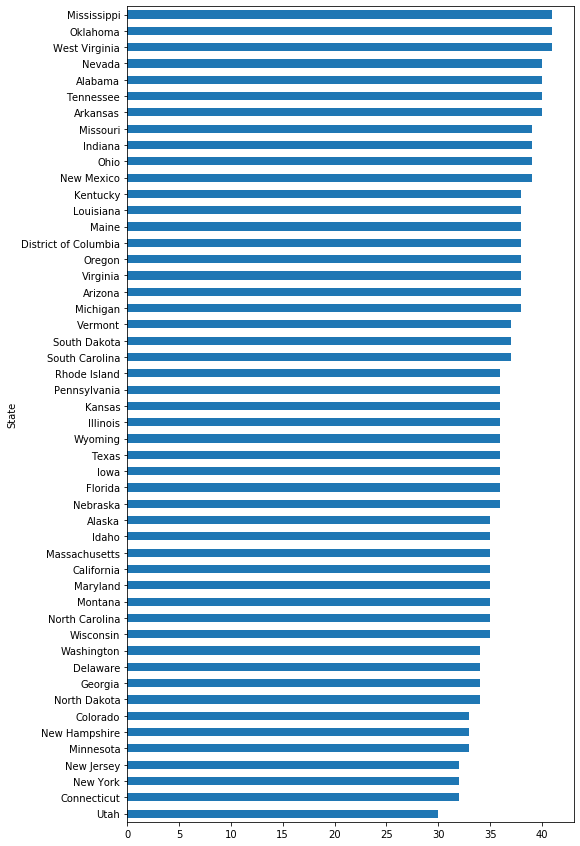

In [13]:
# Bar graph for Cancer Death_per_hundred_Cancer_Patient Rankwise 
bx= Rounded_data.set_index('State')
cx= bx.sort_values("Cancer Death_per_hundred_cancer_patient")                                
 
ax= cx['Cancer Death_per_hundred_cancer_patient'].plot(kind="barh", figsize=(8,15))


The correlation between both factors is 0.59
y = 0.28x + 37.17


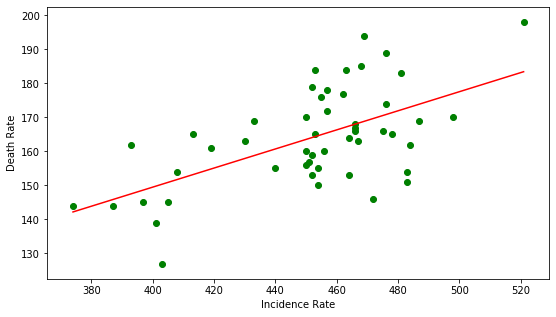

In [14]:
# Scatter plot, correlation, linear regression with Incidence Rate and Death Rate
Rounded_data.plot.scatter(x='Incidence Rate', y='Death Rate',figsize=(9,5))
x_axis= Rounded_data["Incidence Rate"] 
y_axis= Rounded_data["Death Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_axis= Rounded_data["Incidence Rate"] 
y_axis= Rounded_data["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_axis,y_axis, color = 'green')
plt.plot(x_axis,regress_values,"r-")
plt.xlabel('Incidence Rate')
plt.ylabel('Death Rate')
plt.show()

In [15]:
#Correlation cofficient
pearsoncorr = Rounded_data.corr(method='pearson')
pearsoncorr

,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
Incidence Rate,1.000000,-0.021789,0.593269,-0.030054,-0.045042
Average Annual Count_x,-0.021789,1.000000,-0.147511,0.997122,-0.146855
Death Rate,0.593269,-0.147511,1.000000,-0.109428,0.710124
Average Annual Count_y,-0.030054,0.997122,-0.109428,1.000000,-0.091903
Cancer Death_per_hundred_cancer_patient,-0.045042,-0.146855,0.710124,-0.091903,1.000000


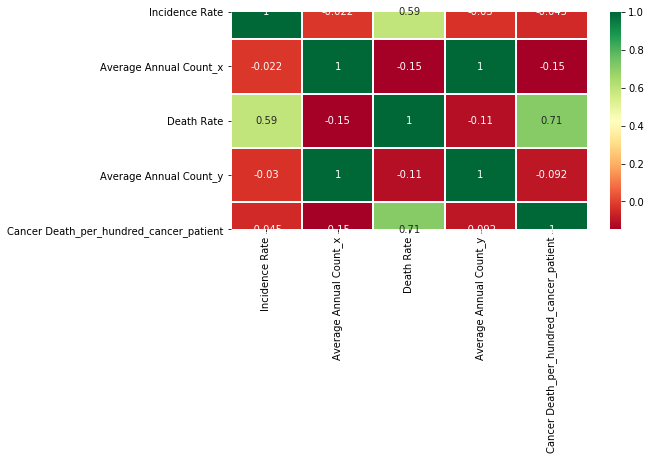

In [16]:
fig = plt.figure(figsize = (8,4))
fig = plt.tight_layout()
fig = sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdYlGn',
            annot=True,
            linewidth=1.0)

In [17]:
Incidence_gender_metadata = "Resource/New Cancer/USCS_by_Gender.csv" 
Incidence_gender_metadata = pd.read_csv(Incidence_gender_metadata)
Incidence_gender_metadata


,CancerType,Year,Sex,AgeSpecificRate,CaseCount,Population
0,'All Cancer Sites Combined','2012-2016','Female','420.9','4069572','809147519'
1,'All Cancer Sites Combined','2012-2016','Male','488.8','4120977','784148557'


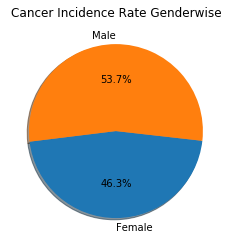

In [18]:

Incidence_data = ['420.9','488.8']
labels = ['Female', 'Male']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]

plt.pie(Incidence_data, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=187)
plt.title("Cancer Incidence Rate Genderwise")
plt.show()


In [19]:
Death_gender_metadata = "Resource/Cancer death/USCS_by_gender.csv" 
Death_gender_metadata = pd.read_csv(Death_gender_metadata)
Death_gender_metadata

,CancerType,Year,Sex,AgeSpecificRate,DeathCount,Population
0,'All Cancer Sites Combined','2012-2016','Female','137.7','1400236','809147519'
1,'All Cancer Sites Combined','2012-2016','Male','193.1','1552879','784148557'


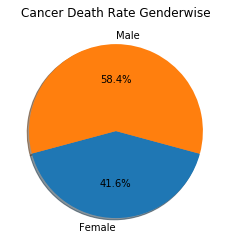

In [20]:
Incidence_data = ['137.7','193.1']
labels = ['Female', 'Male']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]

plt.pie(Incidence_data, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=195)
plt.title("Cancer Death Rate Genderwise")
plt.show()

In [21]:
highlow_cancer_inc_data = "Resource/heighest_lowest_Incidencerate_data.csv"
highlow_cancer_inc_data = pd.read_csv(highlow_cancer_inc_data)
highlow_cancer_inc_data = highlow_cancer_inc_data.set_index('State')
highlow_cancer_inc_data.head()

,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
State,,,,,
New Mexico,374.0,9116.0,144.0,3514.0,39.0
Arizona,387.0,30448.0,144.0,11508.0,38.0
Nevada,393.0,12409.0,162.0,4934.0,40.0
Wyoming,397.0,2638.0,145.0,943.0,36.0
Colorado,401.0,22701.0,139.0,7520.0,33.0


In [22]:
pearsoncorr = highlow_cancer_inc_data.corr(method='pearson')
pearsoncorr

,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
Incidence Rate,1.000000,-0.029896,0.725968,-0.045466,-0.086529
Average Annual Count_x,-0.029896,1.000000,-0.200410,0.997620,-0.207152
Death Rate,0.725968,-0.200410,1.000000,-0.181105,0.542786
Average Annual Count_y,-0.045466,0.997620,-0.181105,1.000000,-0.164139
Cancer Death_per_hundred_cancer_patient,-0.086529,-0.207152,0.542786,-0.164139,1.000000


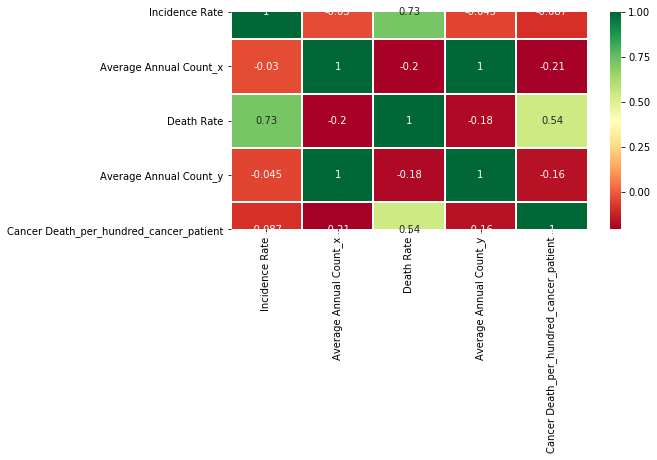

In [23]:
fig = plt.figure(figsize = (8,4))
fig = plt.tight_layout()
fig = sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdYlGn',
            annot=True,
            linewidth=1.0)

The correlation between both Incidence and Death rate is 0.73
y = 0.28x + 37.7


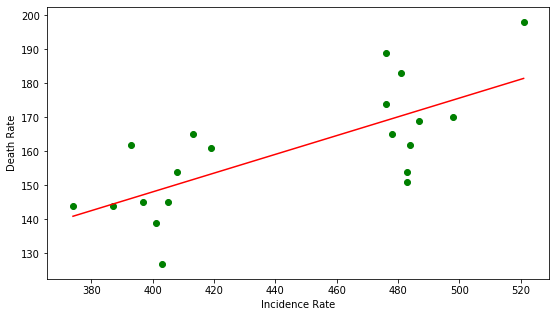

In [24]:
cx = highlow_cancer_inc_data
cx.plot.scatter(x='Incidence Rate', y='Death Rate',figsize=(9,5))
x_axis= cx["Incidence Rate"] 
y_axis= cx["Death Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both Incidence and Death rate is {round(correlation[0],2)}")
x_axis= cx["Incidence Rate"] 
y_axis= cx["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_axis,y_axis, color = 'green')
plt.plot(x_axis,regress_values,"r-")
plt.xlabel('Incidence Rate')
plt.ylabel('Death Rate')
plt.show()

In [25]:
highlow_cancer_death_data = "Resource/heighest_lowest_deathrate_data.csv"
highlow_cancer_death_data = pd.read_csv(highlow_cancer_death_data)
highlow_cancer_death_data = highlow_cancer_death_data.set_index('State')
highlow_cancer_death_data.head()

,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
State,,,,,
Utah,403.0,10143.0,127.0,3021.0,30.0
Colorado,401.0,22701.0,139.0,7520.0,33.0
New Mexico,374.0,9116.0,144.0,3514.0,39.0
Arizona,387.0,30448.0,144.0,11508.0,38.0
California,405.0,165242.0,145.0,58588.0,35.0


In [26]:
pearsoncorr = highlow_cancer_death_data.corr(method='pearson')
pearsoncorr

,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
Incidence Rate,1.000000,-0.001950,0.729858,-0.000723,0.207787
Average Annual Count_x,-0.001950,1.000000,-0.140628,0.995965,-0.201172
Death Rate,0.729858,-0.140628,1.000000,-0.093325,0.798203
Average Annual Count_y,-0.000723,0.995965,-0.093325,1.000000,-0.137166
Cancer Death_per_hundred_cancer_patient,0.207787,-0.201172,0.798203,-0.137166,1.000000


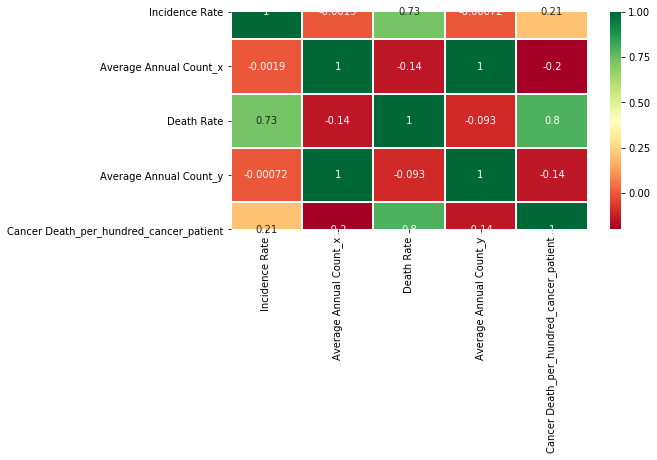

In [27]:
fig = plt.figure(figsize = (8,4))
fig = plt.tight_layout()
fig = sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdYlGn',
            annot=True,
            linewidth=1.0)

The correlation between both factors is 0.73
y = 0.41x + -20.39


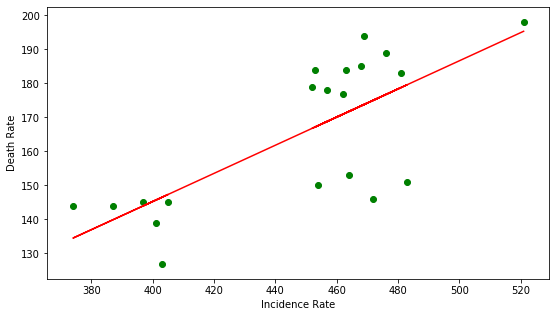

In [28]:
cx = highlow_cancer_death_data
cx.plot.scatter(x='Incidence Rate', y='Death Rate',figsize=(9,5))
x_axis= cx["Incidence Rate"] 
y_axis= cx["Death Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_axis= cx["Incidence Rate"] 
y_axis= cx["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.scatter(x_axis,y_axis, color = 'green')
plt.plot(x_axis,regress_values,"r-")
plt.xlabel('Incidence Rate')
plt.ylabel('Death Rate')
plt.show()

In [29]:
#sam's part
#import air quality data and cancer data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
df=pd.read_csv("../Row-2-Group-Project/CSV Files/Air Quality Data/final_air_quality_data.csv")

In [30]:
merge_table = pd.merge(df, final_combined_cancer_data, on="State")
merge_table

,State,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,...,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y
0,Alabama,274.82,213.47,59.65,1.41,0.29,0.00,0.00,113.88,55.24,...,0.00,0.94,154.41,0.59,115.35,3.53,451.9,26110.0,179.0,10332.0
1,Alaska,285.29,236.71,40.00,5.29,3.29,0.00,0.00,88.43,52.86,...,0.00,0.57,105.71,0.29,150.43,28.29,413.0,2784.0,164.9,977.0
2,Arizona,363.69,237.31,106.54,16.92,2.62,0.15,0.15,234.69,70.62,...,0.00,2.62,192.85,20.46,36.77,111.00,387.0,30448.0,144.1,11508.0
3,Arkansas,274.73,242.00,32.36,0.18,0.18,0.00,0.00,91.45,51.73,...,0.00,2.36,165.55,22.36,84.45,0.00,467.8,16551.0,185.2,6623.0
4,California,351.81,214.48,108.74,22.96,4.63,0.41,0.59,270.56,82.76,...,0.00,4.41,221.28,0.00,109.98,16.15,404.8,165242.0,145.3,58588.0
5,Colorado,293.83,230.33,60.60,2.67,0.20,0.03,0.00,105.10,54.00,...,0.03,9.17,194.83,0.63,26.33,62.83,401.4,22701.0,138.9,7520.0
6,Connecticut,316.12,245.12,60.50,8.50,2.00,0.00,0.00,164.62,70.00,...,0.00,11.50,220.00,0.00,84.62,0.00,472.4,20843.0,145.8,6657.0
7,Delaware,365.33,276.00,84.33,4.67,0.33,0.00,0.00,139.67,65.33,...,0.00,4.67,271.33,0.33,89.00,0.00,498.4,5803.0,169.6,1989.0
8,Florida,357.82,313.53,43.76,0.45,0.08,0.00,0.00,95.66,51.68,...,0.11,1.05,239.87,5.00,100.11,11.68,451.9,121916.0,152.6,43285.0
9,Georgia,286.56,224.78,58.34,2.97,0.47,0.00,0.00,129.75,57.91,...,0.00,1.47,128.81,4.09,152.19,0.00,466.4,49003.0,165.6,16650.0


In [31]:
#Sort data into top ten highest and bottom ten lowest death rates by state
cx= final_combined_cancer_data.sort_values("Death Rate")
cx.head(10)
cx.tail(10)
dx = pd.concat([cx.head(10),cx.tail(10)])
highest=cx.head(10)
lowest=cx.tail(10)
#create two dataframes-one containing the 10 states with the highest cancer death rate and one containing the 10 states with the lowest cancer death rate

merge_high = pd.merge(highest, df, on="State")
merge_high

merge_low=pd.merge(lowest,df,on="State")
merge_low

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,...,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Ohio,461.9,64858.0,177.1,25317.0,316.59,252.59,60.37,3.51,0.12,...,0.0,109.88,57.44,35.83,0.10,8.56,162.56,28.12,110.02,7.22
1,Indiana,457.1,34242.0,178.4,13416.0,283.92,232.00,49.13,2.72,0.05,...,0.0,111.72,55.38,33.05,0.08,1.44,127.97,49.26,104.26,0.92
2,Alabama,451.9,26110.0,179.0,10332.0,274.82,213.47,59.65,1.41,0.29,...,0.0,113.88,55.24,39.71,0.00,0.94,154.41,0.59,115.35,3.53
3,Louisiana,480.6,24888.0,183.0,9346.0,327.62,275.14,51.14,1.33,0.00,...,0.0,97.38,53.43,37.24,0.00,3.62,212.38,3.57,107.57,0.48
4,Oklahoma,452.9,19837.0,183.7,8082.0,338.94,290.24,48.18,0.47,0.06,...,0.0,95.47,52.12,38.00,0.00,8.12,236.82,4.41,71.71,17.88
5,Tennessee,462.6,35692.0,184.0,14111.0,274.90,218.70,52.65,3.00,0.55,...,0.0,121.05,57.80,38.25,0.10,3.90,188.00,15.80,64.90,2.20
6,Arkansas,467.8,16551.0,185.2,6623.0,274.73,242.00,32.36,0.18,0.18,...,0.0,91.45,51.73,33.55,0.00,2.36,165.55,22.36,84.45,0.00
7,West Virginia,476.0,11653.0,189.4,4756.0,297.57,261.57,35.07,0.93,0.00,...,0.0,98.29,51.79,34.36,2.43,0.00,159.57,41.86,81.93,11.79
8,Mississippi,468.6,15923.0,193.6,6522.0,308.00,269.40,38.50,0.10,0.00,...,0.0,87.30,51.70,37.50,0.00,5.80,195.50,2.30,104.40,0.00
9,Kentucky,520.9,26945.0,197.9,10206.0,314.93,255.96,57.25,1.57,0.14,...,0.0,111.71,56.46,39.36,0.04,2.07,198.93,8.89,104.18,0.82


The r-squared is: -0.143670975235193


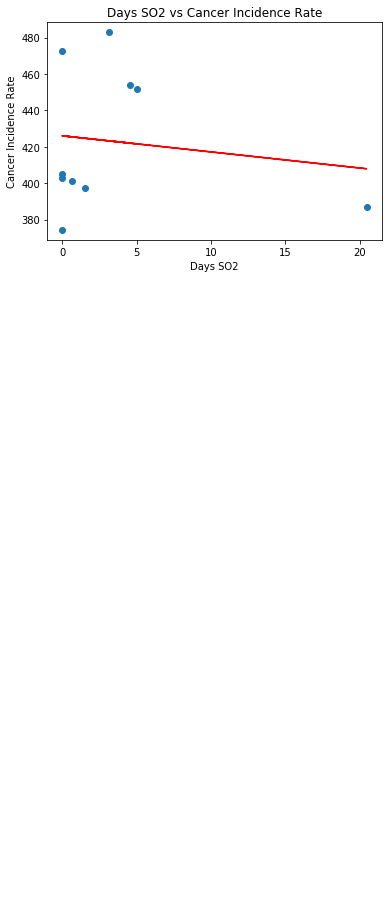

The correlation coefficient is -14.367097523519302


In [32]:
#Scatter plot displaying the percentage of days SO2 was the main air pollutant for the top ten states againt cancer incidence rates

x_axis=merge_high["Days SO2"]
data=merge_high["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,data)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Days SO2 vs Cancer Incidence Rate')
plt.xlabel('Days SO2')
plt.ylabel('Cancer Incidence Rate')
print(f"The r-squared is: {rvalue}")
plt.show()
correlation=st.pearsonr(x_axis,data)
# correlation
cf=correlation[0]*100

print (f"The correlation coefficient is {cf}")


The r-squared is: 0.3731927549163195


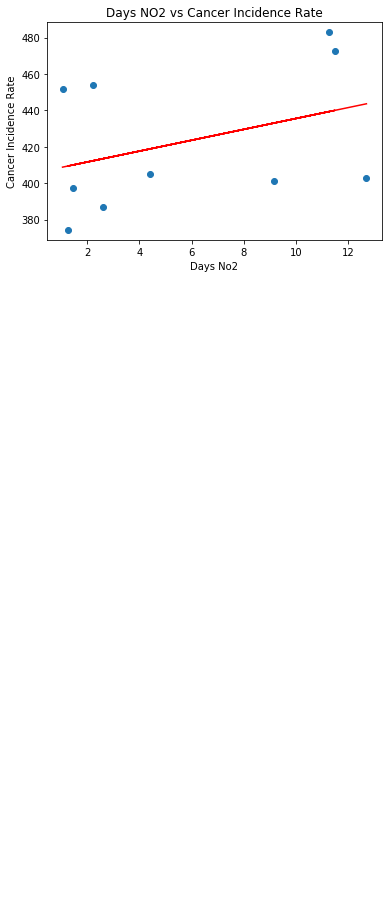

The correlation coefficient is 37.31927549163194


In [33]:
#Scatter plot displaying the percentage of days NO2 was the main air pollutant for the top ten states againt cancer incidence rates

x_axis=merge_high["Days NO2"]
data=merge_high["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,data)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Days NO2 vs Cancer Incidence Rate')
plt.xlabel('Days No2')
plt.ylabel('Cancer Incidence Rate')
print(f"The r-squared is: {rvalue}")
plt.show()
correlation=st.pearsonr(x_axis,data)
# correlation
cf=correlation[0]*100

print (f"The correlation coefficient is {cf}")


The r-squared is: 0.43453212303628963


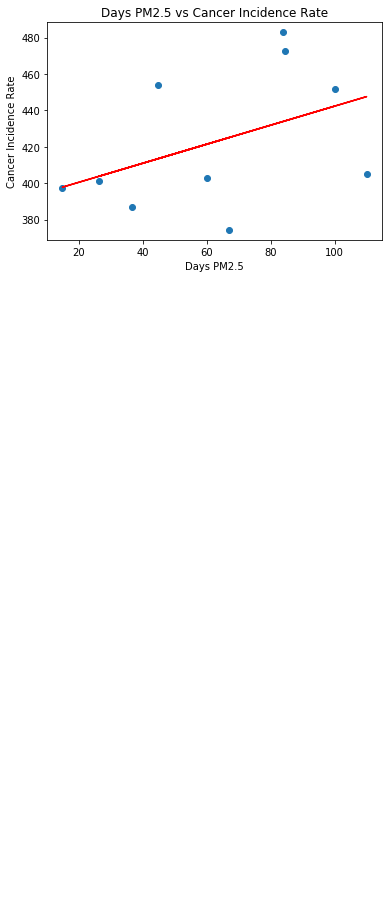

The correlation coefficient is 43.453212303628945


In [34]:
#scatter plot displaying the percentage of days PM2.5 was the main air pollutant for the top ten states against cancer incidence rates

x_axis=merge_high["Days PM2.5"]
data=merge_high["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,data)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Days PM2.5 vs Cancer Incidence Rate')
plt.xlabel('Days PM2.5')
plt.ylabel('Cancer Incidence Rate')
print(f"The r-squared is: {rvalue}")
plt.show()
correlation=st.pearsonr(x_axis,data)
# correlation
cf=correlation[0]*100

print (f"The correlation coefficient is {cf}")


The r-squared is: 0.1954397575462291


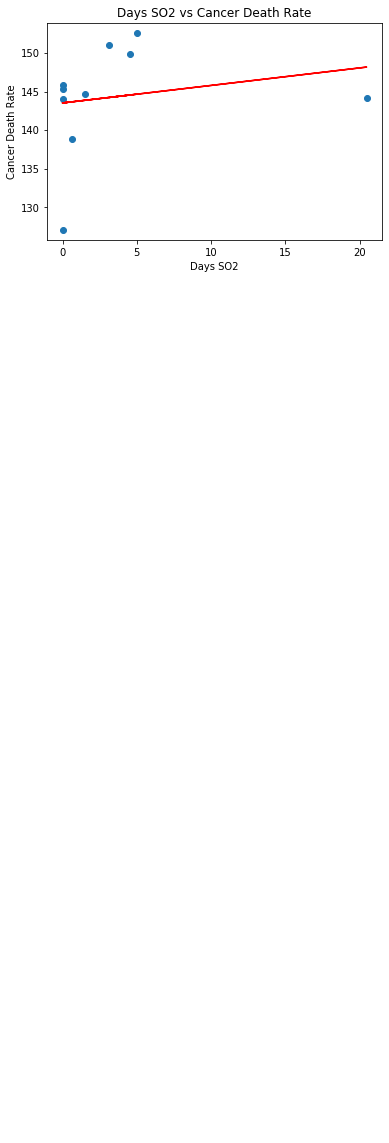

The correlation coefficient is 19.543975754622913


In [35]:
#scatter plot displaying the percentage of days SO2 was the main air pollutant for the top ten states against cancer death rate

x_axis=merge_high["Days SO2"]
data=merge_high["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,data)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Days SO2 vs Cancer Death Rate')
plt.xlabel('Days SO2')
plt.ylabel('Cancer Death Rate')
print(f"The r-squared is: {rvalue}")
plt.show()
correlation=st.pearsonr(x_axis,data)
# correlation
cf=correlation[0]*100

print (f"The correlation coefficient is {cf}")



The r-squared is: 0.3165043395109343


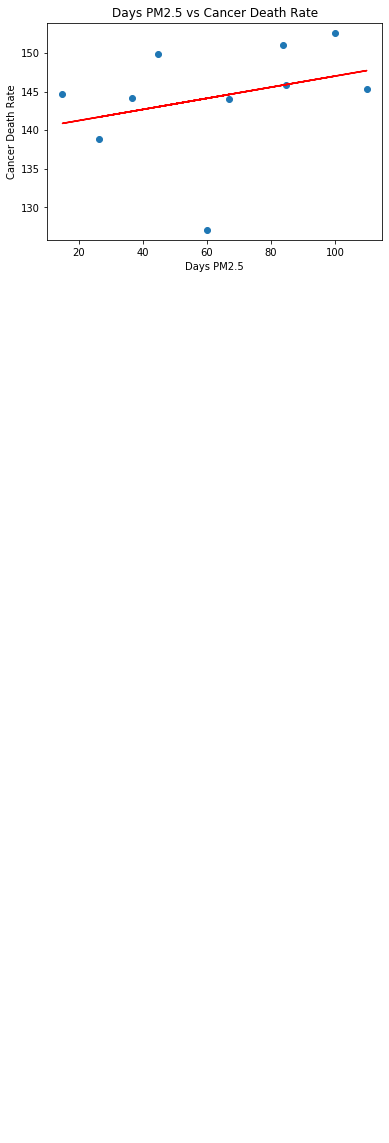

The correlation coefficient is 31.650433951093426


In [36]:
#scatter plot displaying the percentage of days PM2.5 was the main air pollutant for the top ten states against cancer death rate
x_axis=merge_high["Days PM2.5"]
data=merge_high["Death Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,data)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Days PM2.5 vs Cancer Death Rate')
plt.xlabel('Days PM2.5')
plt.ylabel('Cancer Death Rate')
print(f"The r-squared is: {rvalue}")
plt.show()
correlation=st.pearsonr(x_axis,data)
# correlation
cf=correlation[0]*100

print (f"The correlation coefficient is {cf}")

The r-squared is: 0.17042483169900444


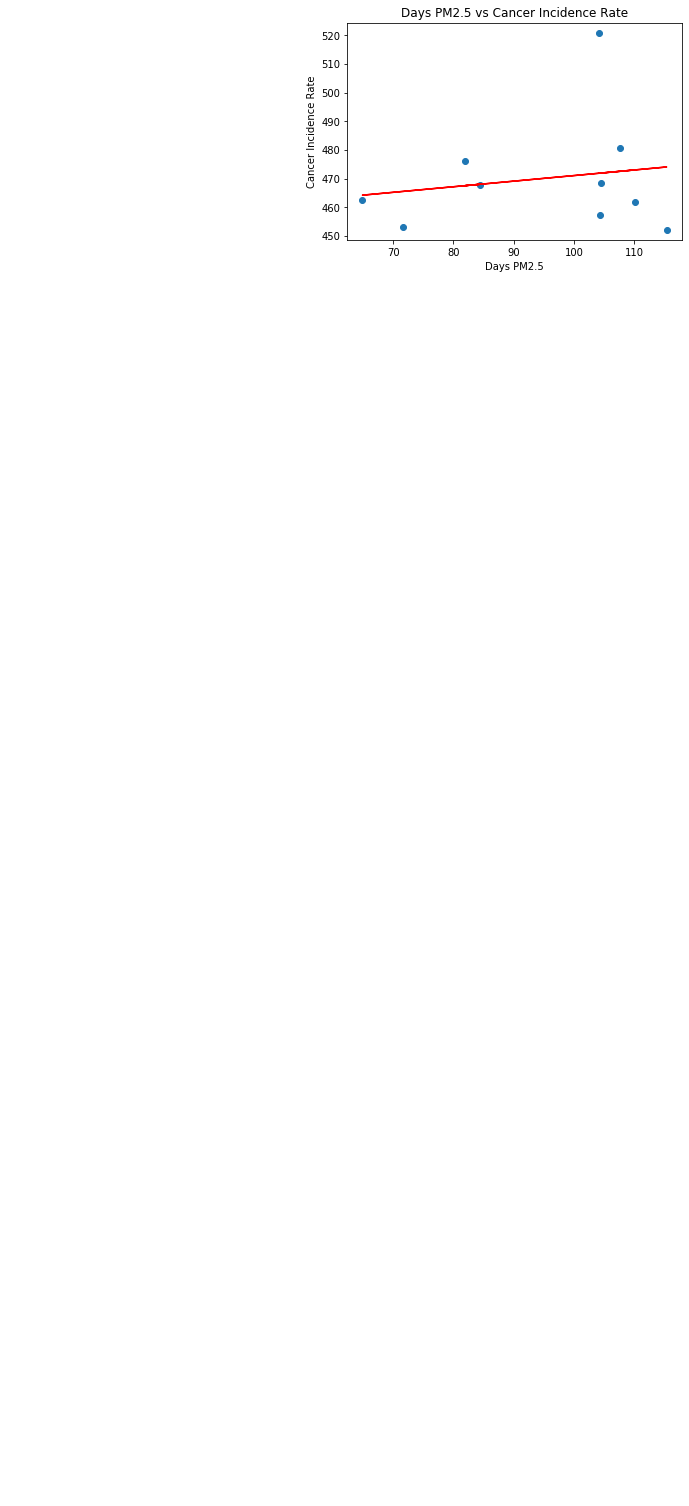

The correlation coefficient is 17.04248316990045


In [37]:
#scatter plot displaying the percentage of days PM2.5 was the main pollutant for the bottom ten states against cancer incidence rate
x_axis=merge_low["Days PM2.5"]
data=merge_low["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,data)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Days PM2.5 vs Cancer Incidence Rate')
plt.xlabel('Days PM2.5')
plt.ylabel('Cancer Incidence Rate')
print(f"The r-squared is: {rvalue}")
plt.show()
correlation=st.pearsonr(x_axis,data)
# correlation
cf=correlation[0]*100

print (f"The correlation coefficient is {cf}")




In [38]:

x_axis = np.arange(len(merge_low))
print(x_axis)
x_labels_low=merge_low["State"].tolist()
print(x_labels_low)



[0 1 2 3 4 5 6 7 8 9]
['Ohio', 'Indiana', 'Alabama', 'Louisiana', 'Oklahoma', 'Tennessee', 'Arkansas', 'West Virginia', 'Mississippi', 'Kentucky']


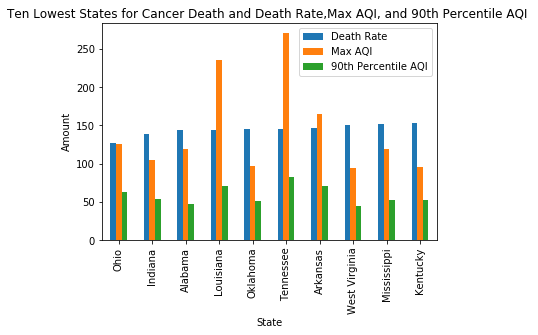

In [39]:
#bar chart plotting death rate, max aqi, and 90th percentile AQI against cancer death rates for top ten states
ax=merge_high[["Death Rate","Max AQI","90th Percentile AQI"]].plot.bar(rot=0)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_labels_low)
plt.xticks(rotation=90)
plt.ylabel("Amount")
plt.xlabel("State")
plt.title("Ten Lowest States for Cancer Death and Death Rate,Max AQI, and 90th Percentile AQI ")
plt.savefig("C:\\Users\\samantha.ettinger\\CancerBar.png")

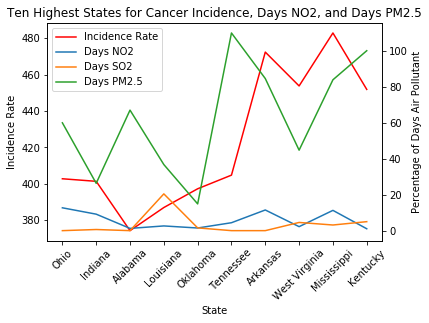

In [40]:
#ten highest states for cancer incidence, days no2,
tick_locations = [value for value in x_axis]

fig, ax1 = plt.subplots()
# ax1.plot(merge_high["Incidence Rate"],color='red',label='Incidence Rate')
ax1.plot(merge_high["Incidence Rate"],color='red',label="Incidence Rate")

ax2 = ax1.twinx()
# ax2.plot(merge_high[["Days NO2","Days SO2","Days PM2.5"]],label='Days NO2')
ax2.plot(merge_high["Days NO2"],label='Days NO2')
ax2.plot(merge_high["Days SO2"],label='Days SO2')
ax2.plot(merge_high["Days PM2.5"],label='Days PM2.5')
plt.title("Ten Highest States for Cancer Incidence, Days NO2, and Days PM2.5")
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
plt.xticks(tick_locations,x_labels_low)
ax1.set_ylabel('Incidence Rate')
ax2.set_ylabel('Percentage of Days Air Pollutant')
ax1.set_xlabel('State')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
plt.savefig("C:\\Users\\samantha.ettinger\\Line Fig.jpeg")


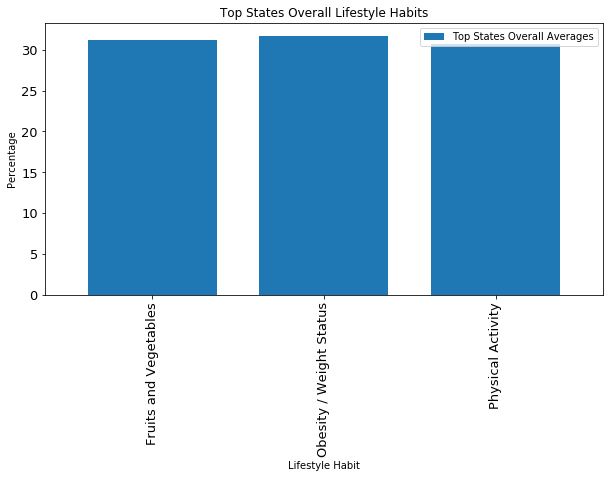

In [41]:
#Anishaa's part

#plotting the bar graph - Top States wide

cat_topstates_data = "../Row-2-Group-Project/RAW data/cat_topstates_data.csv"
combined_data = pd.read_csv(cat_topstates_data)

cat_topstates_data = pd.DataFrame(combined_data).dropna()


ax = cat_topstates_data.plot(kind='bar',x="Category", y= "Top States Overall Averages",figsize=(10,5), fontsize=13,width=0.75)
plt.legend(loc='best')
plt.title('Top States Overall Lifestyle Habits')
plt.xlabel('Lifestyle Habit')
plt.ylabel('Percentage')
plt.savefig('../Row-2-Group-Project/Top_States_Overall_Lifestyle_Bar_Chart.png',bbox_inches='tight')

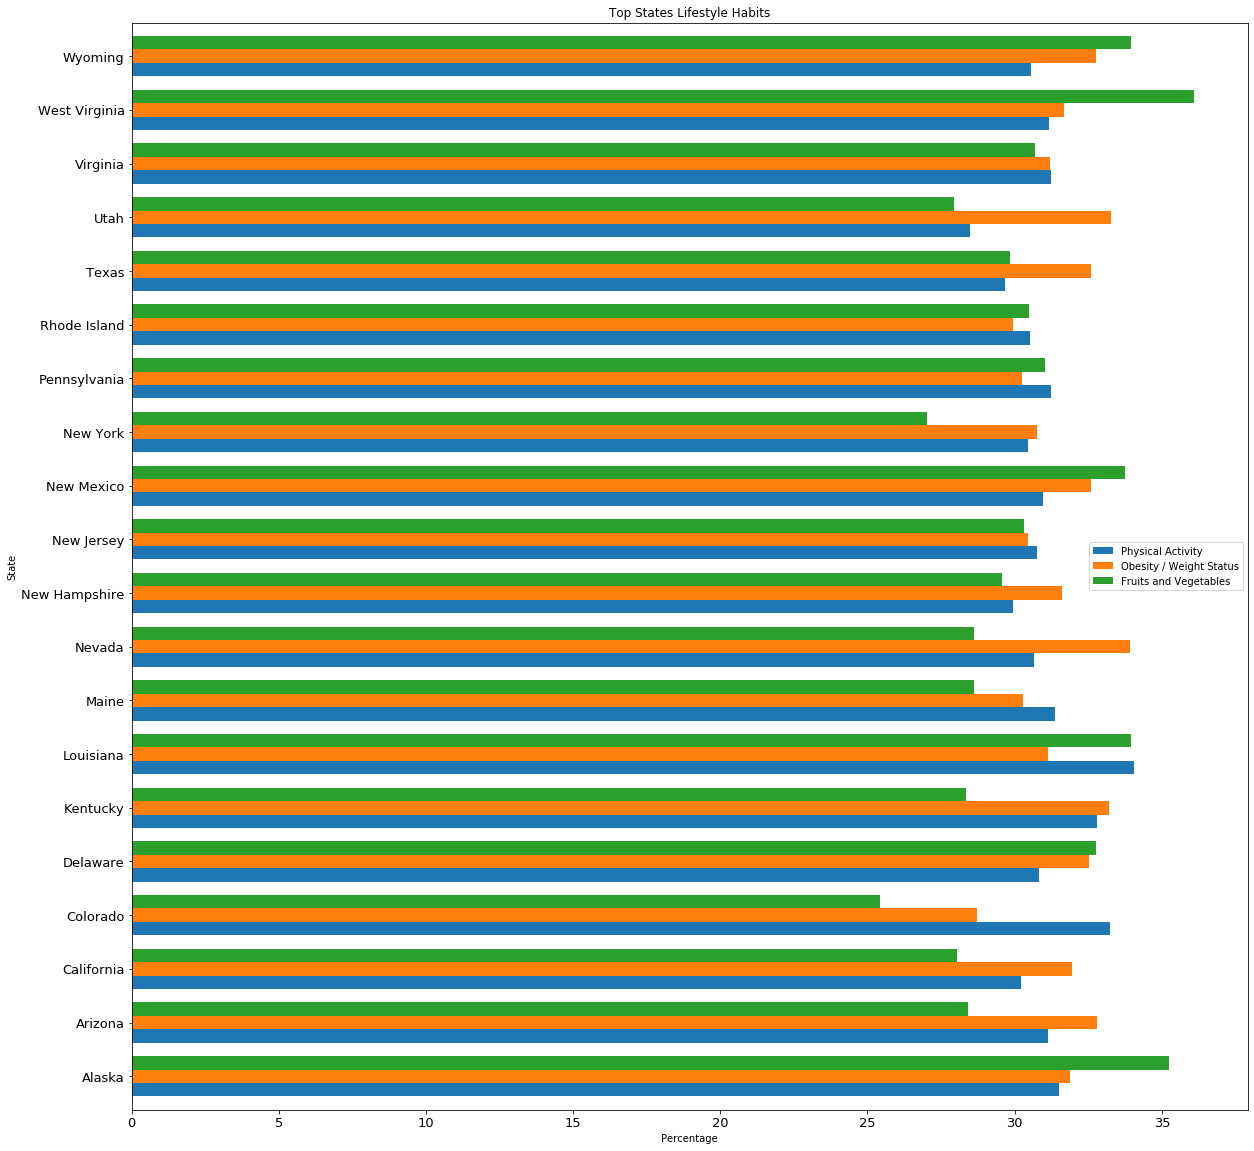

In [42]:
#plotting the bar graph - by State

cat_data_file = "../Row-2-Group-Project/RAW data/cat_data.csv"
combined_cat_data = pd.read_csv(cat_data_file)

cat_data = pd.DataFrame(combined_cat_data).dropna()

ax = cat_data.plot(kind='barh', x= "State",figsize=(20,20), fontsize=13,width=0.75)
plt.legend(loc='best')
plt.title('Top States Lifestyle Habits')
plt.xlabel('Percentage')
plt.savefig('../Row-2-Group-Project/Top_States_Lifestyle_Bar_Chart.png',bbox_inches='tight')
plt.show()

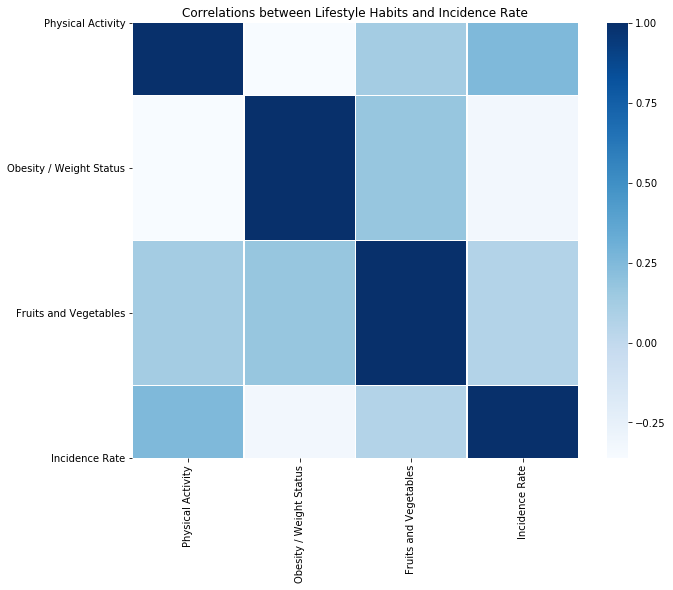

In [43]:
#Top States Overall Correlations (Top States with data)
import seaborn as sns



corr_cat_data_file = "../Row-2-Group-Project/RAW data/corr_cat_data.csv"
combined_corr_cat_data = pd.read_csv(corr_cat_data_file)

corr_cat_data = pd.DataFrame(combined_corr_cat_data).dropna()


fig, ax = plt.subplots(figsize=(10,8))
akws = {"ha": 'left',"va": 'bottom'}

sns.heatmap(corr_cat_data.corr(method='pearson'), annot=False, annot_kws = akws,fmt='.2f', 
            cmap=plt.get_cmap('Blues'), cbar=True, ax=ax,linewidths = 0.5,)

ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.title("Correlations between Lifestyle Habits and Incidence Rate")
plt.savefig('../Row-2-Group-Project/Lifestyle_Correlation_Chart.png',bbox_inches='tight')
plt.show()

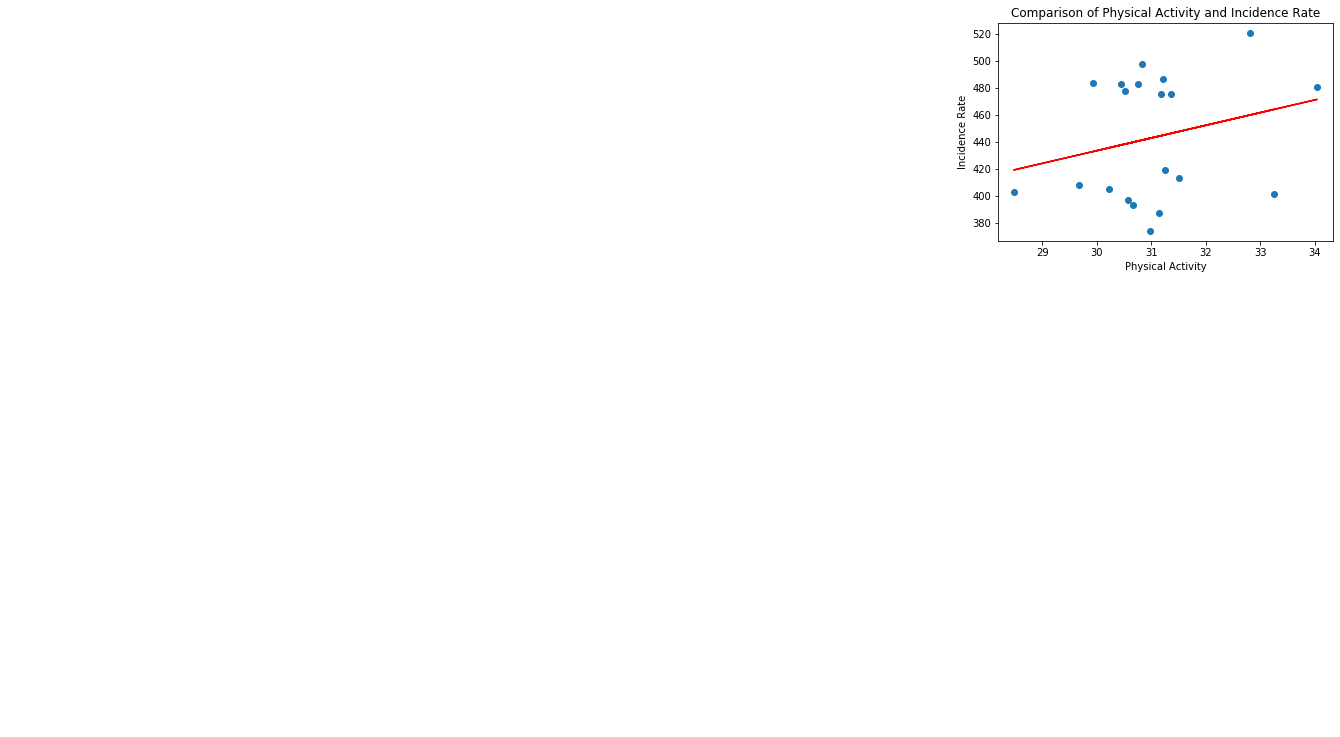

In [45]:
#Scatter plot of Physical Activity V Incidence Rate
from scipy.stats import linregress

cat_data_file = "../Row-2-Group-Project/RAW data/cat_data.csv"
combined_cat_data = pd.read_csv(cat_data_file)

cat_data = pd.DataFrame(combined_cat_data).dropna()


corr_cat_data_file = "../Row-2-Group-Project/RAW data/corr_cat_data.csv"
combined_corr_cat_data = pd.read_csv(corr_cat_data_file)

corr_cat_data = pd.DataFrame(combined_corr_cat_data).dropna()

x_values = cat_data["Physical Activity"]
y_values = corr_cat_data["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.title('Comparison of Physical Activity and Incidence Rate')
plt.xlabel('Physical Activity')
plt.ylabel('Incidence Rate')
plt.savefig('../Row-2-Group-Project/Physical_Activity_Incidence_Scatter_Chart.png')
plt.show()




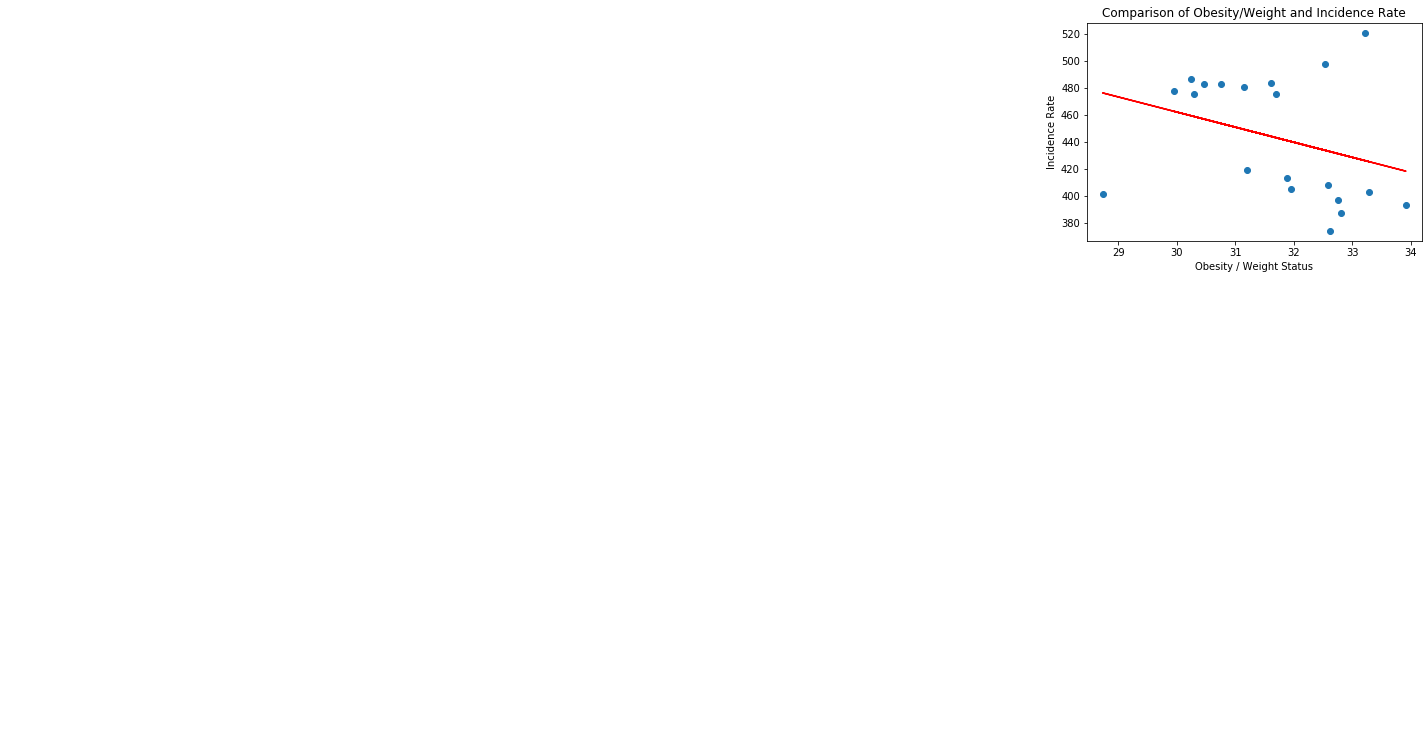

In [47]:
#Scatter plot of Physical Activity V Incidence Rate
cat_data_file = "../Row-2-Group-Project/RAW data/cat_data.csv"
combined_cat_data = pd.read_csv(cat_data_file)

cat_data = pd.DataFrame(combined_cat_data).dropna()


corr_cat_data_file = "../Row-2-Group-Project/RAW data/corr_cat_data.csv"
combined_corr_cat_data = pd.read_csv(corr_cat_data_file)

corr_cat_data = pd.DataFrame(combined_corr_cat_data).dropna()

x_values = cat_data["Obesity / Weight Status"]
y_values = corr_cat_data["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.title('Comparison of Obesity/Weight and Incidence Rate')
plt.xlabel('Obesity / Weight Status')
plt.ylabel('Incidence Rate')
plt.savefig('../Row-2-Group-Project/Obesity_Incidence_Scatter_Chart.png')
plt.show()



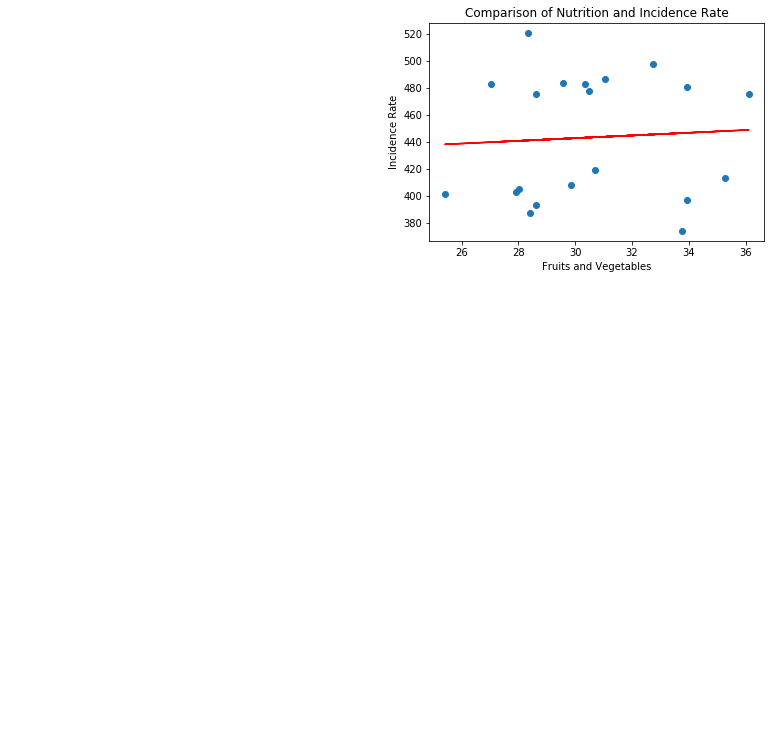

In [48]:
#Scatter plot of Physical Activity V Incidence Rate
cat_data_file = "../Row-2-Group-Project/RAW data/cat_data.csv"
combined_cat_data = pd.read_csv(cat_data_file)

cat_data = pd.DataFrame(combined_cat_data).dropna()


corr_cat_data_file = "../Row-2-Group-Project/RAW data/corr_cat_data.csv"
combined_corr_cat_data = pd.read_csv(corr_cat_data_file)

corr_cat_data = pd.DataFrame(combined_corr_cat_data).dropna()

x_values = cat_data["Fruits and Vegetables"]
y_values = corr_cat_data["Incidence Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.title('Comparison of Nutrition and Incidence Rate')
plt.xlabel('Fruits and Vegetables')
plt.ylabel('Incidence Rate')
plt.savefig('../Row-2-Group-Project/Nutrition_Incidence_Scatter_Chart.png')
plt.show()



In [49]:
#Joseph's Data and code.

In [50]:
state_job_fig = "CSV Files/Total Jobs per State"
total_ind_state = "CSV Files/Total Worker per Category"
state_ind_breakdown = "CSV Files/Manufacturing Jobs by Industry"
state_lab_force = "CSV Files/BLS Civilian Labor Force By State.csv"
combined_cancer = "Cancer Incidence & Death Rates/Resource/Added_final_combined_cancer_data.csv"

In [51]:
state_job_df = pd.read_csv(state_job_fig)
total_ind_df = pd.read_csv(total_ind_state)
st_in_brk_df = pd.read_csv(state_ind_breakdown)
state_lab_df = pd.read_csv(state_lab_force)
cancer_rate_df = pd.read_csv(combined_cancer)

In [52]:
job_lab_df = pd.merge(state_job_df,state_lab_df, on="State" )
job_lab_df.head()

,State,Workers per State,Civilia Labor Force,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Alabama,128315,"2,181,837",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,3239,"353,728",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,56602,"3,252,711",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,76421,"1,327,435",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,517711,"19,192,788",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
job_lab_df= job_lab_df.rename(columns={"Civilia Labor Force":"Labor Force"})

In [54]:
job_lab_df = job_lab_df.drop(columns=["Unnamed: 2","Unnamed: 3", "Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9"])

In [55]:
job_lab_df["Labor Force"]
job_lab_df['Labor Force'] = [int(x.replace(',','')) for x in list(job_lab_df['Labor Force'])]


In [56]:
job_lab_df["Manufacturing Percentage"] = (job_lab_df["Workers per State"]  / job_lab_df['Labor Force']) *100


In [57]:
total_job_total_cancer = pd.merge(job_lab_df,cancer_rate_df, on='State')
total_job_total_cancer.head()

,State,Workers per State,Labor Force,Manufacturing Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,Alabama,128315,2181837,5.881053,451.9,26110.0,179.0,10332.0,39.571046
1,Alaska,3239,353728,0.915675,413.0,2784.0,164.9,977.0,35.093391
2,Arizona,56602,3252711,1.740148,387.0,30448.0,144.1,11508.0,37.795586
3,Arkansas,76421,1327435,5.757043,467.8,16551.0,185.2,6623.0,40.015709
4,California,517711,19192788,2.697425,404.8,165242.0,145.3,58588.0,35.455877


In [58]:
total_job_total_cancer["Workforce Percentage"] = pd.Series(job_lab_df["Manufacturing Percentage"])


In [59]:
total_job_total_cancer = total_job_total_cancer[['State','Workers per State','Workforce Percentage','Incidence Rate','Average Annual Count_x','Death Rate','Cancer Death_per_hundred_cancer_patient']]


Text(0.5, 0, 'Total Manufacturing Employees')

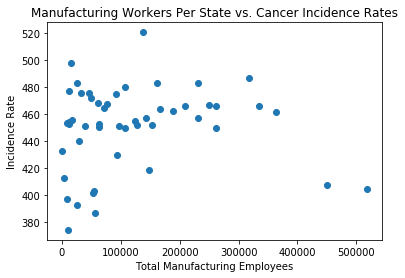

In [60]:
plt.figure()
plt.scatter(total_job_total_cancer["Workers per State"],total_job_total_cancer["Incidence Rate"])

plt.title("Manufacturing Workers Per State vs. Cancer Incidence Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Total Manufacturing Employees")

In [61]:
x_axis= total_job_total_cancer["Workers per State"]
y_axis= total_job_total_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Cancer Indicence Rate is {round(correlation[0],2)}")

The pearson correlation between Workers per State and Cancer Indicence Rate is 0.06


Text(0.5, 0, 'Manufacturing Workforce Percentage')

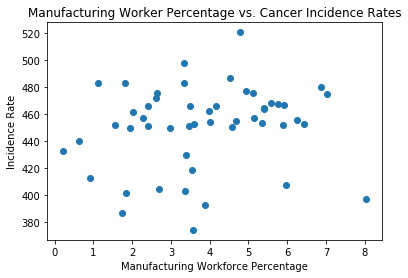

In [62]:
plt.figure()
plt.scatter(total_job_total_cancer["Workforce Percentage"],total_job_total_cancer["Incidence Rate"])

plt.title("Manufacturing Worker Percentage vs. Cancer Incidence Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Manufacturing Workforce Percentage")

In [63]:
x_axis= total_job_total_cancer["Workforce Percentage"]
y_axis= total_job_total_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between percentage of workers and Incidence Rate is {round(correlation[0],2)}")


The pearson correlation between percentage of workers and Incidence Rate is 0.16


In [64]:
x_axis= total_job_total_cancer["Workers per State"]
y_axis= total_job_total_cancer["Cancer Death_per_hundred_cancer_patient"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Workers per State and Cancer Death Rate is {round(correlation[0],2)}")

The pearson correlation between Workers per State and Cancer Death Rate is 0.01


In [65]:
merged_data = pd.merge(st_in_brk_df,job_lab_df,on="State",how="left")
merged_data.head()

,Job Category,People Employed,State,Year,NAICS Code,Workers per State,Labor Force,Manufacturing Percentage
0,Basic chemical manufacturing,4474,New Jersey,2016,3251,161424,4515938,3.574540
1,Basic chemical manufacturing,7003,Ohio,2016,3251,364242,5673884,6.419624
2,Basic chemical manufacturing,4631,New York,2016,3251,230548,9539259,2.416833
3,Basic chemical manufacturing,820,New Mexico,2016,3251,10553,935358,1.128231
4,Basic chemical manufacturing,2363,Missouri,2016,3251,124148,3093755,4.012858


In [66]:
st_in_brk_df = merged_data
st_in_brk_df["Manufacturing Percentage"] = (st_in_brk_df["People Employed"]  / st_in_brk_df['Labor Force']) *100

In [67]:
petro_coal_manu = st_in_brk_df.loc[st_in_brk_df["NAICS Code"]==3241]


In [68]:
pc_cancer = pd.merge(petro_coal_manu,cancer_rate_df, on="State" )


Text(0.5, 0, 'Total Petroleum & Coal Employees')

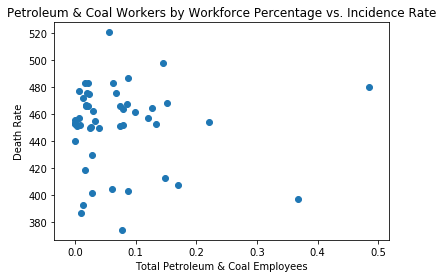

In [69]:
plt.figure()
plt.scatter(pc_cancer["Manufacturing Percentage"],pc_cancer["Incidence Rate"])

plt.title("Petroleum & Coal Workers by Workforce Percentage vs. Incidence Rate")
plt.ylabel("Death Rate")
plt.xlabel("Total Petroleum & Coal Employees")

In [70]:
x_axis= pc_cancer["Manufacturing Percentage"]
y_axis= pc_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Coal & Petroleum Workers per State and Incidence Rate is {round(correlation[0],2)}")

The pearson correlation between Coal & Petroleum Workers per State and Incidence Rate is -0.04


In [71]:
chemical_manu = st_in_brk_df.loc[st_in_brk_df["Job Category"]=="Chemical manufacturing"]


In [72]:
chem_cancer = pd.merge(chemical_manu,cancer_rate_df, on="State" )


Text(0.5, 0, 'Workforce Percentage of Chemical Manufacture Employees')

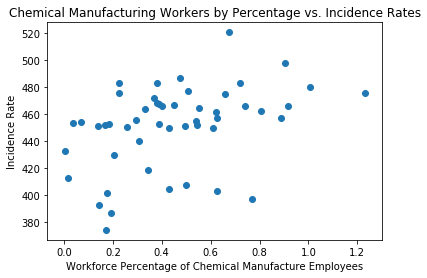

In [73]:
plt.figure()
plt.scatter(chem_cancer["Manufacturing Percentage"],chem_cancer["Incidence Rate"])

plt.title("Chemical Manufacturing Workers by Percentage vs. Incidence Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Workforce Percentage of Chemical Manufacture Employees")

In [74]:
x_axis= chem_cancer["Manufacturing Percentage"]
y_axis= chem_cancer["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between Chemical Manufacturing Workers and Incidence Rates is {round(correlation[0],2)}")

The pearson correlation between Chemical Manufacturing Workers and Incidence Rates is 0.4


In [75]:
dx = cancer_rate_df.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = True)
low_can_death = dx.head(10)
low_can_death.head()

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
44,Utah,402.8,10143.0,127.0,3021.0,29.784088
5,New York,482.9,111527.0,151.0,35491.0,31.822787
11,Connecticut,472.4,20843.0,145.8,6657.0,31.938780
4,New Jersey,483.3,50921.0,153.5,16407.0,32.220498
45,Colorado,401.4,22701.0,138.9,7520.0,33.126294


In [76]:
bot_can_death = pd.merge(job_lab_df,low_can_death, on ='State')
bot_can_death = bot_can_death.sort_values("Cancer Death_per_hundred_cancer_patient", ascending=True)
bot_can_death.head()

,State,Workers per State,Labor Force,Manufacturing Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
8,Utah,54867,1522330,3.604146,402.8,10143.0,127.0,3021.0,29.784088
7,New York,230548,9539259,2.416833,482.9,111527.0,151.0,35491.0,31.822787
1,Connecticut,49562,1887269,2.626123,472.4,20843.0,145.8,6657.0,31.938780
6,New Jersey,161424,4515938,3.574540,483.3,50921.0,153.5,16407.0,32.220498
0,Colorado,53580,2899662,1.847802,401.4,22701.0,138.9,7520.0,33.126294


Text(0.5, 0, 'Percentage of Manufacturing Employees')

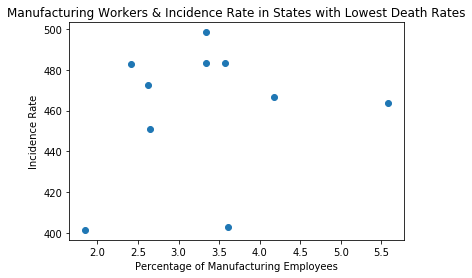

In [77]:
plt.figure()
plt.scatter(bot_can_death["Manufacturing Percentage"],bot_can_death["Incidence Rate"])

plt.title("Manufacturing Workers & Incidence Rate in States with Lowest Death Rates")
plt.ylabel("Incidence Rate")
plt.xlabel("Percentage of Manufacturing Employees")

In [78]:
x_axis= bot_can_death["Manufacturing Percentage"]
y_axis= bot_can_death["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between the percentage of manufacturing workers and Incidence Rates is {round(correlation[0],2)}")

The pearson correlation between the percentage of manufacturing workers and Incidence Rates is 0.22


In [79]:
dx2 = dx.tail(20)

In [80]:
high_can_death = dx2.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = False)


In [81]:
top_can_ind = pd.merge(job_lab_df, high_can_death, on= "State")
top_can_ind = top_can_ind.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = False)

Text(0.5, 0, 'Precentage of Workforce in Manufacturing')

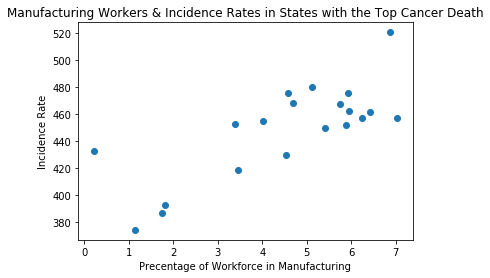

In [82]:
plt.figure()
plt.scatter(top_can_ind["Manufacturing Percentage"],top_can_ind["Incidence Rate"])

plt.title("Manufacturing Workers & Incidence Rates in States with the Top Cancer Death")
plt.ylabel("Incidence Rate")
plt.xlabel("Precentage of Workforce in Manufacturing")

In [83]:
x_axis= top_can_ind["Manufacturing Percentage"]
y_axis= top_can_ind["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between the percentage of a workforce in manufacturing and the Incidence Rate is {round(correlation[0],2)}")

The pearson correlation between the percentage of a workforce in manufacturing and the Incidence Rate is 0.77


In [84]:
top_pc_death = pd.merge(petro_coal_manu, high_can_death, on= "State")
top_pc_death = top_pc_death.sort_values("Cancer Death_per_hundred_cancer_patient", ascending = False)
top_pc_death.head()

,Job Category,People Employed,State,Year,NAICS Code,Workers per State,Labor Force,Manufacturing Percentage,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
13,Petroleum and coal products manufacturing,1963,Mississippi,2016,3241,60455,1290731,0.152084,468.6,15923.0,193.6,6522.0,40.959618
15,Petroleum and coal products manufacturing,519,West Virginia,2016,3241,45957,775724,0.066905,476.0,11653.0,189.4,4756.0,40.813524
5,Petroleum and coal products manufacturing,2461,Oklahoma,2016,3241,62254,1835037,0.134112,452.9,19837.0,183.7,8082.0,40.742048
9,Petroleum and coal products manufacturing,1137,Arkansas,2016,3241,76421,1327435,0.085654,467.8,16551.0,185.2,6623.0,40.015709
18,Petroleum and coal products manufacturing,175,Nevada,2016,3241,25744,1427057,0.012263,392.6,12409.0,162.3,4934.0,39.761463


Text(0.5, 0, 'Precentage of Workforce in Coal & Petroleum Manufacturing')

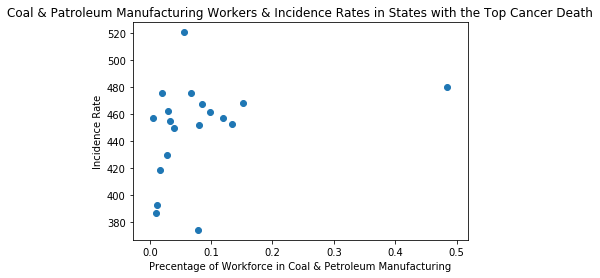

In [85]:
plt.figure()
plt.scatter(top_pc_death["Manufacturing Percentage"],top_pc_death["Incidence Rate"])

plt.title("Coal & Patroleum Manufacturing Workers & Incidence Rates in States with the Top Cancer Death")
plt.ylabel("Incidence Rate")
plt.xlabel("Precentage of Workforce in Coal & Petroleum Manufacturing")

In [86]:
x_axis= top_pc_death["Manufacturing Percentage"]
y_axis= top_pc_death["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between the percentage of a workforce in coal & petroleum manufacturing and the Incidence Rate is {round(correlation[0],2)}")

The pearson correlation between the percentage of a workforce in coal & petroleum manufacturing and the Incidence Rate is 0.31


In [87]:
x_axis= top_pc_death["Manufacturing Percentage"]
y_axis= top_pc_death["Incidence Rate"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between the percentage of a workforce in coal & petroleum manufacturing and the Incidence Rate is {round(correlation[0],2)}")

The pearson correlation between the percentage of a workforce in coal & petroleum manufacturing and the Incidence Rate is 0.31


In [88]:
top_chem_death = pd.merge(chem_cancer, high_can_death, on= "State")
top_chem_death = top_chem_death.sort_values("Cancer Death_per_hundred_cancer_patient_x", ascending = False)
top_chem_death.head()

,Job Category,People Employed,State,Year,NAICS Code,Workers per State,Labor Force,Manufacturing Percentage,Incidence Rate_x,Average Annual Count_x_x,Death Rate_x,Average Annual Count_y_x,Cancer Death_per_hundred_cancer_patient_x,Incidence Rate_y,Average Annual Count_x_y,Death Rate_y,Average Annual Count_y_y,Cancer Death_per_hundred_cancer_patient_y
7,Chemical manufacturing,4892,Mississippi,2016,325,60455,1290731,0.379010,468.6,15923.0,193.6,6522.0,40.959618,468.6,15923.0,193.6,6522.0,40.959618
12,Chemical manufacturing,9540,West Virginia,2016,325,45957,775724,1.229819,476.0,11653.0,189.4,4756.0,40.813524,476.0,11653.0,189.4,4756.0,40.813524
13,Chemical manufacturing,3411,Oklahoma,2016,325,62254,1835037,0.185882,452.9,19837.0,183.7,8082.0,40.742048,452.9,19837.0,183.7,8082.0,40.742048
5,Chemical manufacturing,5141,Arkansas,2016,325,76421,1327435,0.387288,467.8,16551.0,185.2,6623.0,40.015709,467.8,16551.0,185.2,6623.0,40.015709
17,Chemical manufacturing,2049,Nevada,2016,325,25744,1427057,0.143582,392.6,12409.0,162.3,4934.0,39.761463,392.6,12409.0,162.3,4934.0,39.761463


Text(0.5, 0, 'Precentage of Workforce in Chemical Manufacturing')

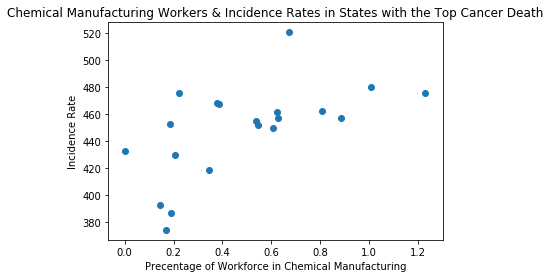

In [89]:
plt.figure()
plt.scatter(top_chem_death["Manufacturing Percentage"],top_chem_death["Incidence Rate_x"])

plt.title("Chemical Manufacturing Workers & Incidence Rates in States with the Top Cancer Death")
plt.ylabel("Incidence Rate")
plt.xlabel("Precentage of Workforce in Chemical Manufacturing")

In [90]:
x_axis= top_chem_death["Manufacturing Percentage"]
y_axis= top_chem_death["Incidence Rate_x"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between the percentage of a workforce in chemical manufacturing and the Incidence Rate is {round(correlation[0],2)}")

The pearson correlation between the percentage of a workforce in chemical manufacturing and the Incidence Rate is 0.6


In [91]:
#Ben's Part
cancer_df = pd.read_csv("Resource/Added_final_combined_cancer_data.csv")
cancer_df.head()

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,New Mexico,374.0,9116.0,144.0,3514.0,39.0
1,Arizona,387.0,30448.0,144.0,11508.0,38.0
2,Nevada,393.0,12409.0,162.0,4934.0,40.0
3,Wyoming,397.0,2638.0,145.0,943.0,36.0
4,Colorado,401.0,22701.0,139.0,7520.0,33.0


In [92]:
cancer_df = cancer_df.sort_values("Cancer Death_per_hundred_cancer_patient", ascending=True)
cancer_df.head()

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
5,Utah,403.0,10143.0,127.0,3021.0,30.0
38,Connecticut,472.0,20843.0,146.0,6657.0,32.0
44,New York,483.0,111527.0,151.0,35491.0,32.0
45,New Jersey,483.0,50921.0,154.0,16407.0,32.0
30,Minnesota,464.0,28996.0,153.0,9691.0,33.0


In [93]:
cancer_df = cancer_df.sort_values("Cancer Death_per_hundred_cancer_patient", ascending=True)
cancer_df.head()

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
5,Utah,403.0,10143.0,127.0,3021.0,30.0
38,Connecticut,472.0,20843.0,146.0,6657.0,32.0
44,New York,483.0,111527.0,151.0,35491.0,32.0
45,New Jersey,483.0,50921.0,154.0,16407.0,32.0
30,Minnesota,464.0,28996.0,153.0,9691.0,33.0


In [94]:
cancer_df = cancer_df.sort_values("Cancer Death_per_hundred_cancer_patient", ascending=True)
cancer_df.head()

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
5,Utah,403.0,10143.0,127.0,3021.0,30.0
38,Connecticut,472.0,20843.0,146.0,6657.0,32.0
44,New York,483.0,111527.0,151.0,35491.0,32.0
45,New Jersey,483.0,50921.0,154.0,16407.0,32.0
30,Minnesota,464.0,28996.0,153.0,9691.0,33.0


In [95]:
top = cancer_df.head(10)
top

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
5,Utah,403.0,10143.0,127.0,3021.0,30.0
38,Connecticut,472.0,20843.0,146.0,6657.0,32.0
44,New York,483.0,111527.0,151.0,35491.0,32.0
45,New Jersey,483.0,50921.0,154.0,16407.0,32.0
30,Minnesota,464.0,28996.0,153.0,9691.0,33.0
46,New Hampshire,484.0,8129.0,162.0,2718.0,33.0
4,Colorado,401.0,22701.0,139.0,7520.0,33.0
22,North Dakota,454.0,3725.0,150.0,1283.0,34.0
34,Georgia,466.0,49003.0,166.0,16650.0,34.0
48,Delaware,498.0,5803.0,170.0,1989.0,34.0


In [96]:
income_df = pd.read_csv("State income.csv")
income_df.head()

,Unnamed: 0,Population,Household Income,State
0,0,20612439.0,50860.0,Florida
1,1,10310371.0,53559.0,Georgia
2,2,1428557.0,74511.0,Hawaii
3,3,1683140.0,51807.0,Idaho
4,4,12801539.0,60960.0,Illinois


In [97]:
top_income =pd.merge(income_df, top, on="State", how="left").dropna()
top_income
#top_income.to_csv("top income.csv", sep=",")

,Unnamed: 0,Population,Household Income,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
1,1,10310371.0,53559.0,Georgia,466.0,49003.0,166.0,16650.0,34.0
14,14,5519952.0,65599.0,Minnesota,464.0,28996.0,153.0,9691.0,33.0
20,20,1334795.0,70936.0,New Hampshire,484.0,8129.0,162.0,2718.0,33.0
21,21,8944469.0,76126.0,New Jersey,483.0,50921.0,154.0,16407.0,32.0
23,23,19745289.0,62909.0,New York,483.0,111527.0,151.0,35491.0,32.0
25,25,757953.0,60656.0,North Dakota,454.0,3725.0,150.0,1283.0,34.0
35,35,3051217.0,65977.0,Utah,403.0,10143.0,127.0,3021.0,30.0
48,48,5540545.0,65685.0,Colorado,401.0,22701.0,139.0,7520.0,33.0
49,49,3576452.0,73433.0,Connecticut,472.0,20843.0,146.0,6657.0,32.0
50,50,952065.0,61757.0,Delaware,498.0,5803.0,170.0,1989.0,34.0


In [98]:
top_pearson = top_income.corr(method="pearson")
top_pearson

,Unnamed: 0,Population,Household Income,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
Unnamed: 0,1.000000,-0.390532,0.327928,-0.235094,-0.372747,-0.338329,-0.390740,-0.195070
Population,-0.390532,1.000000,-0.166271,0.172259,0.992300,0.028671,0.993734,-0.174791
Household Income,0.327928,-0.166271,1.000000,0.094084,-0.103668,-0.275130,-0.120627,-0.503431
Incidence Rate,-0.235094,0.172259,0.094084,1.000000,0.265604,0.827984,0.268589,0.407838
Average Annual Count_x,-0.372747,0.992300,-0.103668,0.265604,1.000000,0.072289,0.999476,-0.166549
Death Rate,-0.338329,0.028671,-0.275130,0.827984,0.072289,1.000000,0.089313,0.762590
Average Annual Count_y,-0.390740,0.993734,-0.120627,0.268589,0.999476,0.089313,1.000000,-0.145847
Cancer Death_per_hundred_cancer_patient,-0.195070,-0.174791,-0.503431,0.407838,-0.166549,0.762590,-0.145847,1.000000


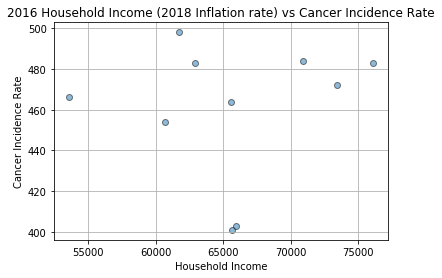

The r-squared is: 0.0940843467683528
y = 0.0x + 429.55


In [99]:
top_household_income = top_income["Household Income"]
top_incidence_rate = top_income["Incidence Rate"]
top_death = top_income["Death Rate"]
top_cancer_hundred = top_income["Cancer Death_per_hundred_cancer_patient"]

#Scatterplot 
plt.scatter(top_household_income, top_incidence_rate, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Incidence Rate")
plt.xlabel("Household Income")
plt.ylabel("Cancer Incidence Rate")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(top_household_income, top_incidence_rate)
tempregress_values = top_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))
#plt.annotate(templine_eq, (6,10), fontsize=15, color ="red")

plt.savefig("income_vs_cancerincidence.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

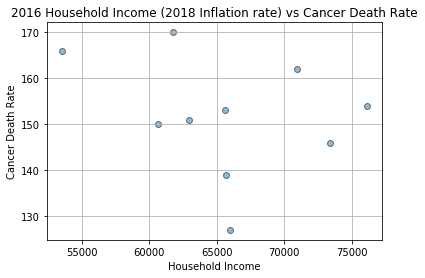

The r-squared is: -0.2751303386460733
y = -0.0x + 186.65


In [100]:
plt.scatter(top_household_income, top_death, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Death Rate")
plt.xlabel("Household Income")
plt.ylabel("Cancer Death Rate")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(top_household_income, top_death)
tempregress_values = top_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))

plt.savefig("income_vs_cancerdeath.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

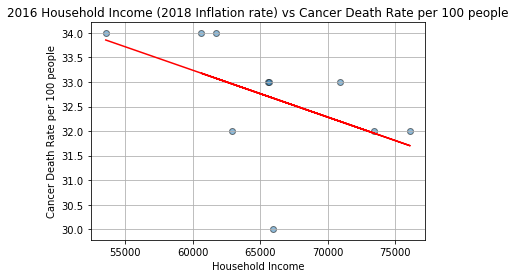

The r-squared is: -0.5034307903477202
y = -0.0x + 38.97


In [101]:
plt.scatter(top_household_income, top_cancer_hundred, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Death Rate per 100 people")
plt.xlabel("Household Income")
plt.ylabel("Cancer Death Rate per 100 people")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(top_household_income, top_cancer_hundred)
regress_values = top_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))
plt.plot(top_household_income, regress_values, "r-")
plt.savefig("income_vs_cancerdeathhundred.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

In [102]:
bottom_income = pd.merge(income_df, bottom, on="State", how="left").dropna()
bottom_income
#bottom_income.to_csv("bottom income.csv", sep=",")

NameError: name 'bottom' is not defined

In [103]:
bottom_pearson = bottom_income.corr(method="pearson")
bottom_pearson

NameError: name 'bottom_income' is not defined

In [ ]:
bottom_household_income = bottom_income["Household Income"]
bottom_incidencerate = bottom_income["Incidence Rate"]
bottom_deathrate = bottom_income["Death Rate"]
bottom_hundred = bottom_income["Cancer Death_per_hundred_cancer_patient"]

plt.scatter(bottom_household_income, bottom_incidencerate, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Incidence Rate")
plt.xlabel("Household Income")
plt.ylabel("Incidence Rate")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(bottom_household_income, bottom_incidencerate)
regress_values = bottom_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))
plt.plot(bottom_household_income, regress_values, "r-")
plt.savefig("bottom_income_vs_bottom_incidencerate.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

In [ ]:
plt.scatter(bottom_household_income, bottom_deathrate, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Death Rate")
plt.xlabel("Household Income")
plt.ylabel("Cancer Death Rate")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(bottom_household_income, bottom_deathrate)
regress_values = bottom_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))
plt.plot(bottom_household_income, regress_values, "r-")
plt.savefig("bottom_income_vs_bottom_deathrate.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

In [ ]:
plt.scatter(bottom_household_income, bottom_hundred, edgecolors="black", alpha=.5)
plt.title("2016 Household Income (2018 Inflation rate) vs Cancer Death Rate per 100 people")
plt.xlabel("Household Income")
plt.ylabel("Cancer Death Rate per 100 people")
plt.grid()
(slope, intercept, rvalue, pvalue, stderr) = linregress(bottom_household_income, bottom_hundred)
regress_values = bottom_household_income*slope + intercept
templine_eq = "y =" + str(round(slope,2)) + "x=" + str(round(intercept, 2))
plt.plot(bottom_household_income, regress_values, "r-")
plt.savefig("bottom_income_vs_bottom_hundred.jpg")
plt.show()
print(f"The r-squared is: {rvalue}")
print( "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

In [1]:
#David's Code
#David's Code
#David's Code
#David's Code
#David's Code
#David's Code

#Note: Some of the graphs somehow get messed up. Not sure what happened, but the correct ones are on the presentation. 

In [45]:
health_info = r"C:\Users\david\Desktop\Davids Branch\Row-2-Group-Project\Health Insurance Coverage by State CSV.csv"
health_info = pd.read_csv(health_info)

cancer_info = r"C:\Users\david\Desktop\Davids Branch\Row-2-Group-Project\Rupesh Cancer Data.csv"
cancer_info = pd.read_csv(cancer_info)

obesity_info = r"C:\Users\david\Desktop\Davids Branch\Row-2-Group-Project\Obesity Rates by State.csv"
obesity_info = pd.read_csv(obesity_info)

#not sure how to make files that can be read right off the bat when downloading. I though it would be like this. 

#Group Project Folder\Row-2-Group-Project\Health Insurance Coverage by State CSV.csv"

#Group Project Folder\Row-2-Group-Project\Rupesh Cancer Data.csv"

#Group Project Folder\Row-2-Group-Project\Obesity Rates by State.csv"

In [46]:
obesity_info_no_Hawaii = obesity_info[obesity_info["State"]!= "Hawaii"]
obesity_info_no_Hawaii

,State,Obesity Prevalence,95% Confidence Interval
0,Alabama,36.2,"(34.6, 37.9)"
1,Alaska,29.5,"(27.0, 32.2)"
2,Arizona,29.5,"(27.8, 31.3)"
3,Arkansas,37.1,"(35.1, 39.1)"
4,California,25.8,"(24.8, 26.9)"
5,Colorado,23.0,"(21.9, 24.0)"
6,Connecticut,27.4,"(26.2, 28.7)"
7,Delaware,33.5,"(31.7, 35.4)"
8,District of Columbia,24.7,"(22.9, 26.5)"
9,Florida,30.7,"(29.1, 32.3)"


In [47]:
cancer_useful_info = cancer_info[["Incidence Rate", "Death Rate"]]
cancer_useful_info

cancer_incidence_rate = cancer_info["Incidence Rate"]
cancer_death_rate = cancer_info["Death Rate"],["State"]

ValueError: x and y must be the same size

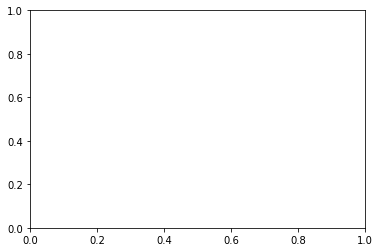

In [48]:
plt.scatter(obesity_info_no_Hawaii["Obesity Prevalence"], cancer_death_rate)

plt.xlabel("Obesity Prevalence")
plt.ylabel("Cancer Death Rate per 100,000")

x_axis= obesity_info_no_Hawaii["Obesity Prevalence"]
y_axis= cancer_death_rate
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between both factors is {round(correlation[0],2)}")

In [49]:
uninsured_rates = health_info["Uninsured Percentage (2016)"]
obesity_rates = obesity_info["Obesity Prevalence"]

The pearson correlation between both factors is 0.29


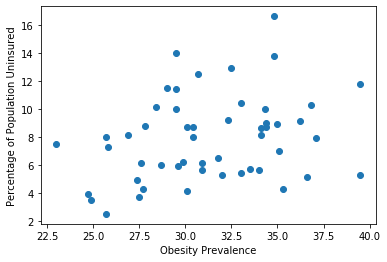

In [50]:
plt.scatter(obesity_rates, uninsured_rates)
plt.xlabel("Obesity Prevalence")
plt.ylabel("Percentage of Population Uninsured")
plt.show

x_axis= uninsured_rates
y_axis= obesity_rates
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between both factors is {round(correlation[0],2)}")

In [51]:
cancer_info

,State,Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,Kentucky,521,26945,198,10206,38
1,Delaware,498,5803,170,1989,34
2,Pennsylvania,487,79060,169,28658,36
3,New Hampshire,484,8129,162,2718,33
4,New Jersey,483,50921,154,16407,32
5,New York,483,111527,151,35491,32
6,Louisiana,481,24888,183,9346,38
7,Rhode Island,478,6163,165,2223,36
8,West Virginia,476,11653,189,4756,41
9,Maine,476,8700,174,3267,38


ValueError: x and y must be the same size

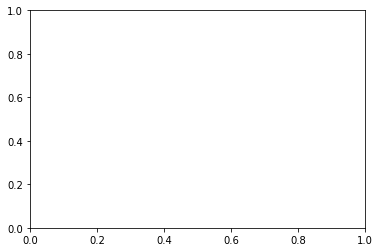

In [52]:
#drop Hawaii
list(uninsured_rates)

uninsured_rates_no_Hawaii = health_info[health_info["State"]!= "Hawaii"]
uninsured_rates_no_Hawaii

plt.scatter(uninsured_rates_no_Hawaii['Uninsured Percentage (2016)'], cancer_death_rate)

plt.xlabel("Percentage of Population Uninsured ")
plt.ylabel("Cancer Death Rate per 100,000")

x_axis= uninsured_rates_no_Hawaii['Uninsured Percentage (2016)']
y_axis= cancer_death_rate
correlation = st.pearsonr(x_axis,y_axis)
print(f"The pearson correlation between both factors is {round(correlation[0],2)}")

The pearson correlation between both factors is 0.03


Text(0, 0.5, 'Cancer Incidence Rate per 100,000')

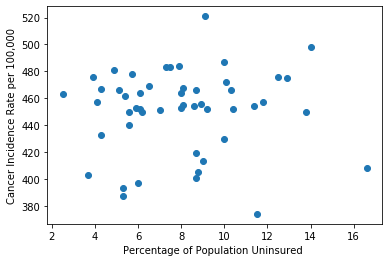

In [53]:
plt.scatter(uninsured_rates_no_Hawaii['Uninsured Percentage (2016)'], cancer_incidence_rate)
correlation = st.pearsonr(uninsured_rates_no_Hawaii['Uninsured Percentage (2016)'],cancer_incidence_rate)
print(f"The pearson correlation between both factors is {round(correlation[0],2)}")

plt.xlabel("Percentage of Population Uninsured ")
plt.ylabel("Cancer Incidence Rate per 100,000")

In [54]:
plt.scatter(uninsured_rates_no_Hawaii['Uninsured Percentage (2016)'], cancer_death_per_hundred)
correlation = st.pearsonr(uninsured_rates_no_Hawaii['Uninsured Percentage (2016)'], cancer_death_per_hundred)
print(f"The pearson correlation between both factors is {round(correlation[0],2)}")

plt.xlabel("Percentage of Population Uninsured ")
plt.ylabel("Cancer Death Rate per 100 Incidences")

NameError: name 'cancer_death_per_hundred' is not defined

In [55]:
#max and min values for health insurance

health_insurance_extremes = uninsured_rates_no_Hawaii.sort_values("Uninsured Percentage (2016)")
health_insurance_extremes.head(10)
health_insurance_extremes.tail(10)
health_insurance_extremes_final = pd.concat([health_insurance_extremes.head(10),health_insurance_extremes.tail(10)])
health_insurance_extremes_final

,State,Uninsured Percentage (2018),Uninsured Percentage (2016),Uninsured Percentage (2015),Uninsured Percentage (2014),Uninsured Percentage (2013)
21,Massachusetts,2.8,2.5,2.8,3.3,3.7
45,Vermont,4.0,3.7,3.8,5.0,7.2
8,District of Columbia,3.2,3.9,3.8,5.3,6.7
23,Minnesota,4.4,4.1,4.5,5.9,8.2
39,Rhode Island,4.1,4.3,5.7,7.4,11.6
15,Iowa,4.7,4.3,5.0,6.2,8.1
6,Connecticut,5.3,4.9,6.0,6.9,9.4
17,Kentucky,5.6,5.1,6.0,8.5,14.3
48,West Virginia,6.4,5.3,6.0,8.6,14.0
49,Wisconsin,5.5,5.3,5.7,7.3,9.1


In [56]:
joined_health_insurance_extremes = pd.merge(health_insurance_extremes_final, cancer_info, on="State")                                                                                        
joined_health_insurance_extremes 

,State,Uninsured Percentage (2018),Uninsured Percentage (2016),Uninsured Percentage (2015),Uninsured Percentage (2014),Uninsured Percentage (2013),Incidence Rate,Average Annual Count_x,Death Rate,Average Annual Count_y,Cancer Death_per_hundred_cancer_patient
0,Massachusetts,2.8,2.5,2.8,3.3,3.7,450,36149,156,12795,35
1,Vermont,4.0,3.7,3.8,5.0,7.2,453,3678,165,1355,37
2,District of Columbia,3.2,3.9,3.8,5.3,6.7,433,2818,169,1082,38
3,Minnesota,4.4,4.1,4.5,5.9,8.2,464,28996,153,9691,33
4,Rhode Island,4.1,4.3,5.7,7.4,11.6,478,6163,165,2223,36
5,Iowa,4.7,4.3,5.0,6.2,8.1,475,17806,166,6479,36
6,Connecticut,5.3,4.9,6.0,6.9,9.4,472,20843,146,6657,32
7,Kentucky,5.6,5.1,6.0,8.5,14.3,521,26945,198,10206,38
8,West Virginia,6.4,5.3,6.0,8.6,14.0,476,11653,189,4756,41
9,Wisconsin,5.5,5.3,5.7,7.3,9.1,467,32160,163,11398,35


The pearson correlation between both factors is 0.43


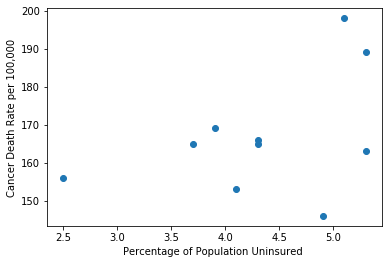

In [57]:
plt.scatter(health_insurance_extremes.head(10)["Uninsured Percentage (2016)"], joined_health_insurance_extremes.head(10)["Death Rate"])

x_axis= health_insurance_extremes.head(10)["Uninsured Percentage (2016)"]
y_axis= joined_health_insurance_extremes.head(10)["Death Rate"]
correlation = st.pearsonr(x_axis,y_axis)

plt.xlabel("Percentage of Population Uninsured ")
plt.ylabel("Cancer Death Rate per 100,000") 

print(f"The pearson correlation between both factors is {round(correlation[0],2)}")